<center><b>CSIE604284 • Analitika Media Sosial</b></center>
<center><b>Fakultas Ilmu Komputer, Universitas Indonesia</b></center>
<center><b>Self Paced Learning - Topic Modeling</b></center>

<b>Instruksi Pengerjaan</b>:
* Self learning ini juga termasuk tugas
* Tugas ini adalah tugas individu namun Anda diperbolehkan berdiskusi dengan teman dalam proses pengerjaan tugas. 
* Anda diberikan berkas TopicModelling.ipynb dan kumpulan data
* Tuliskan jawaban Anda pada berkas ini dan kumpulkan melalui SCeLE dengan format penamaan <b>TopicModelling_Nama_NPM.ipynb</b> sebelum <b>Senin, 21 Maret 2022 pukul 22:00.</b>

# <b>A. Topic Modeling</b><br>
    
<i>Topic modeling</i> adalah suatu teknik <i>unsupervised learning</i> untuk mengekstrak topik-topik yang ada pada suatu kumpulan dokumen teks. Satu dokumen dapat memiliki lebih dari satu topik. <i>Topic modeling</i> dapat membantu mengeksplorasi dokumen teks dengan jumlah yang besar untuk menemukan kelompok kata, kesamaan antara dokumen, menemukan topik abstrak, melakukan <i>clustering</i> dokumen, dan sebagainya. Salah satu penerapannya adalah untuk menyusun buku-buku yang memiliki topik yang mirip berdasarkan isi buku-buku tersebut.  

<img src="https://i.ibb.co/0srwgNv/blei.png" alt="blei image" style="width:75%; height:50%;">
<center>Sumber gambar: Blei, D. M. (2012). Probabilistic topic models. <i>Communications of the ACM, 55</i>(4), 77-84</center>

Terdapat beberapa pendekatan dalam menentukan topik pada suatu teks, misalnya pendekatan Term Frequency and Inverse Document Frequency (TF-IDF), Non-Negative Matrix Factorization (NMF), Latent Semantic Analysis (LSA), dan Latent Dirichlet Allocation (LDA). Pada tutorial kali ini akan dilakukan <i>topic modeling</i> menggunakan pendekatan LDA. Pendekatan LDA dalam <i>topic modeling</i> menganggap setiap dokumen sebagai kumpulan topik dalam proporsi tertentu dan setiap topik sebagai kumpulan kata kunci dalam proporsi tertentu. Topik pada LDA merupakan kumpulan kata kunci dominan yang dapat mewakilkan suatu ciri khas. 

<img src="https://i.ibb.co/QKpbhQx/lda.png" alt="lda image" style="width:75%; height:50%;">
<center>Sumber gambar: http://chdoig.github.io/pytexas2015-topic-modeling/#/3/4</center>


Pada self learning ini, Anda diminta untuk melakukan <i>topic modelling</i> menggunakan pendekatan LDA dengan dataset yang sudah disediakan. Langkah-langkah untuk melakukan <i>topic modelling</i> dengan pendekatan LDA menggunakan <i>dataset</i> tersebut adalah sebagai berikut:

## <b>1. Import library</b><br>
Import seluruh <i>library</i> yang dibutuhkan pada tutorial ini.

<b>#Code 1</b><br>
<i>Code</i> ini digunakan untuk melakukan unduhan dan import library yang diperlukan

In [1]:
# !pip install nltk
# !pip install plotly
# !pip install numpy
# !pip install pandas
# !pip install pyLDAvis
# !pip install gensim
# !pip install scikit-learn
# !pip install tqdm

import os
import numpy as np
import nltk
import re
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import pyLDAvis.gensim_models
# jika masih error "Module not found" setelah instalasi pyldavis, 
# ubah import menjadi "pyLDAvis.gensim" dan semua kemunculan pyLDAvis di bawahnya

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from collections import OrderedDict, Counter
from sklearn.decomposition import NMF
from wordcloud import WordCloud
from tqdm import tqdm

from gensim import corpora, models, similarities
from gensim.models import CoherenceModel

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

/home/sebelum_masehi/Documents/Ilmu Komputer UI/Analitika Media Sosial/Tutorial/Tutorial 2/env/lib/python3.10/site-packages/gensim/matutils.py:22: DeprecationWarning:

Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.

[nltk_data] Downloading package punkt to
[nltk_data]     /home/sebelum_masehi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## <b>2. Membaca data</b><br>
Dataset yang digunakan adalah tweet yang diambil langsung dengan metode scraping melalui media sosial twitter dengan 3 keyword besar yang berbeda dengan rentang waktu 8 Februari 2022 hingga 8 Maret 2022. Setiap keyword dilakukan scrape secara terpisah dan kemudian masing - masing hasilnya digabungkan menjadi satu kesatuan dataset.

Keyword yang digunakan pada dataset yang digunakan adalah:
1. "perang rusia ukraina" -> Diterjemahkan sebagai "perang AND rusia AND ukraina"
2. "masker covid" -> Diterjemahkan sebagai "masker AND covid"
3. "makan keluarga" -> Diterjemahkan sebagai "makan AND keluarga"

Hasil final dari data yang digunakan saat ini berupa data bernama dataset.csv yang berisi 41721 baris data. Dataset akan dibaca dengan menggunakan <i>library</i> bernama pandas.

<b>#Code 2a</b><br>
<i>Code</i> ini digunakan untuk mengambil data dari sumber utama serta membaca dataset utama yang berisi tweet yang akan diolah

In [2]:
# Mengambil data
# !wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rFLB_1QpZhKyWFGxqPo5znTEkh7dUhPf' -O dataset.csv
# !wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xEIQwYre1SR71uRdQuez9MDmAUIysvAG' -O stopwordsID.csv
# !wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=19NOzXA8Voturopg_DTuiMns3s4M2IAUz' -O kamus_singkatan.csv
# !wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1VjgivEr1pxyRCuyhVifPnaReFz0yd8Us' -O colloquial-indonesian-lexicon.csv

# Membaca dataset
datafile = 'dataset.csv'
tweets = pd.read_csv(datafile)
tweets = tweets.drop_duplicates(subset='text')
tweets = tweets.assign(created_at=pd.to_datetime(tweets.created_at))
print('Terdapat ' + str(tweets.shape[0]) + ' Baris data tanpa duplikat tweet yang akan diolah')
tweets.head()

Terdapat 41015 Baris data tanpa duplikat tweet yang akan diolah


,id,text,created_at
0,1501241265613983745,Semalem nginep di rumah temen di kemayoran. Ti...,2022-03-08 16:59:44+00:00
1,1501241240502751233,Makan bareng keluarga di rumah :) https://t.co...,2022-03-08 16:59:38+00:00
2,1501239515020599298,@SetiaAdy_p @MrHannySahara @GeiszChalifah Maka...,2022-03-08 16:52:46+00:00
3,1501239168780828673,#BahagiaItuSederhana Bisa makan dengan keluarga,2022-03-08 16:51:24+00:00
4,1501238820506779648,@0uca @dsuperboy Pernah makan bareng bersama k...,2022-03-08 16:50:01+00:00


<b>#Code 2b</b><br>
<i>Code</i> ini digunakan untuk membuat grafik terkait aktivitas tweet sepanjang waktu

In [3]:
# Melihat aktivitas tweet sepanjang waktu
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format='%y-%m-%d %H:%M:%S')
tweetsT = tweets['created_at']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Aktivitas tweet sepanjang waktu',
    height=450,
    width=1200,
    xaxis=dict(
        title='Bulan dan tahun'
    ),
    yaxis=dict(
        title='Kuantitas tweet'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## <b>3. Pra-pemrosesan data</b><br>
Data yang berasal dari Twitter, atau lebih tepatnya adalah data yang berupa teks adalah data bersifat tidak terstruktur dalam artian data tersebut memiliki format penulisan bebas (tidak sesuai kaidah penulisan yang benar, misalnya kaidah penulisan ejaan baku bahasa indonesia). Oleh karena itu, perlu untuk dilakukan pra-pemrosesan data untuk melakukan normalisasi isi <i>tweet</i>. 

Dalam percobaan ini, dilakukan pra-pemrosesan berupa:

    a. Pembersihan tweet
    Adapun yang dilakukan untuik membersihkan tweet: lowercasing; menghapus url, string b' & RT, emoji, url, username, hashtag, tanda baca, angka, spasi berlebih, trimming, pembuangan tanda baca, dan huruf berulang. Fungsi cleaning(tweet) menerima input berupa satu buah tweet mentah bertipe string. 

<b>#Code 3a</b><br>
<i>Code</i> ini digunakan untuk pembersihan dari setiap tweet yang akan diolah, hal ini dimaksudkan agar mendapatkan data tweet yang lebih "bersih" dan lebih mudah untuk dilakukan pengolahan lebih lanjut

In [4]:
def clean_data(tweet):
    # lowercase
    normal_tw = tweet.lower()
    # hapus b'
    normal_tw = re.sub(r'^b\'', '', normal_tw)
    # hapus RT
    normal_tw = re.sub(r'^rt ', '', normal_tw)
    # hapus emoji
    normal_tw = re.sub(r'\\x.{2}', '', normal_tw)
    # hapus www.* atau https?://* (URL)
    normal_tw = re.sub(r'((www\.[^\s]*)|(https?://[^\s]*))', '', normal_tw)
    # remove spasi berlebih
    normal_tw = re.sub(r'\s+', ' ', normal_tw)
    # trim depan belakang
    normal_tw = normal_tw.strip()
    # regex huruf yang berulang kaya haiiii (untuk fitur unigram)
    normal_regex = re.compile(r"(.)\1{1,}")
    # buang huruf yang berulang
    normal_tw = normal_regex.sub(r"\1\1", normal_tw)
    # hapus @username
    normal_tw = re.sub(r'@[^\s]+', '', normal_tw)
    # hapus hashtag
    normal_tw = re.sub(r'#[^\s]+', '', normal_tw)
    # hapus tanda baca
    normal_tw = re.sub(r'[^\w\s]', '', normal_tw) 
    # hapus angka
    normal_tw = re.sub(r'\d+', ' ', normal_tw) 
    return normal_tw

    b. Pembuangan stopwords dan normalisasi
    Daftar stopwords didapatkan dari penelitian Tala:
    Tala, F. Z. (2003). A Study of Stemming Effects on Information Retrieval in Bahasa Indonesia. M.S. thesis. M.Sc. Thesis. Master of Logic Project. Institute for Logic, Language and Computation. Universiteti van Amsterdam The Netherlands.
    
    Kamus singkatan didapatkan dari penelitian Hakim:
    Hakim, A. N. (2016). Pemrosesan Pertanyaan pada Sistem Tanya Jawab Bidang Kesehatan dengan Pendekatan Pembelajaran Mesin. Bachelor’s Thesis, Universitas Indonesia, Kampus UI Depok.
    
    Kamus alay didapatkan dari penelitian Salsabila:
    N. Aliyah Salsabila, Y. Ardhito Winatmoko, A. Akbar Septiandri and A. Jamal, "Colloquial Indonesian Lexicon," 2018 International Conference on Asian Language Processing (IALP), Bandung, Indonesia, 2018, pp. 226-229, doi: 10.1109/IALP.2018.8629151.

    Fungsi remove_stopwords_and_normalize(tweet) menerima masukan berupa tweet yang telah dibersihkan yang bertipe string.
    
<b># Code 3b</b><br>
<i>Code</i> ini digunakan untuk penghapusan stopwords dan normalisasi untuk setiap tweet yang akan diolah

In [5]:
def remove_stopwords_and_normalize(tweet):
    token = nltk.word_tokenize(tweet)
    token_new = []
    for k in token:
        if k in df_kamus_singkatan['singkatan'].values:
            k = df_kamus_singkatan.loc[df_kamus_singkatan['singkatan']
                                       == k, 'asli'].values[0]
        if k in df_kamus_alay['slang'].values:
            k = df_kamus_alay.loc[df_kamus_alay['slang']
                                  == k, 'formal'].values[0]
        if k not in stopwords[0].values:
            token_new.append(k)

    str_clean = ' '.join(token_new)
    return str_clean

    c. Pra-pemrosesan tweet secara keseluruhan
    Pada tahap ini, akan dilakukan pemanggilan fungsi clean_data dan remove_stopwords_and_normalize yang sudah didefinisikan sebelumnya. Setelah itu akan ditampilkan sampel tiga tweet pertama hasil pra-pemrosesan.
    
<b>#Code 3c</b><br>
<i>Code</i> ini digunakan untuk memanggil fungsi - fungsi pra pemrosean data yang sebelumnya sudah didefinisikan

In [6]:
def pra_pemrosesan(list_tweet):
    tweet_clean = []
    for tw in tqdm(list_tweet):
        normal_tweet = clean_data(tw)
        normal_tweet = remove_stopwords_and_normalize(normal_tweet)
        tweet_clean.append(normal_tweet)
    return tweet_clean

In [7]:
raw_tweet = tweets['text']

stopwords = pd.read_csv("stopwordsID.csv", header=None)
df_kamus_singkatan = pd.read_csv('./kamus_singkatan.csv')
df_kamus_alay = pd.read_csv('colloquial-indonesian-lexicon.csv')

# Melakukan pra pemrosesan tweet.
# CATATAN: proses ini akan memakan waktu sekitar 15-20 menit karena banyaknya data yang perlu diproses
print("Sedang memproses tweet... Mohon menunggu")
clean_tweet = pra_pemrosesan(raw_tweet)

# Menampilkan 10 tweet pertama yang telah dibersihkan
clean_tweet[:10]

Sedang memproses tweet... Mohon menunggu


100%|██████████| 41015/41015 [13:48<00:00, 49.52it/s] 


['semalam menginap rumah teman kemayoran main kesana menginap bekasi kemayoran jarak rumahku kantorku kayak keluarga berasa staycation disana seharian mainmakan bicara males²an',
 'makan bareng keluarga rumah',
 'kirim alamat kirimkan gulai otak beli kuota cebanan menonton videonya full kali makan otak kiriman mikir sih keluarga kaget mikir aneh lihatnya',
 'makan keluarga',
 'makan bareng keluarga',
 'pengin siyg enggak tau keluarga masalahyg mainmakan disuapinbaju sekolah pakeinaku enggak tau keluargasedih yaaku dewasa keadaanpadahal remaja jompo',
 'lately hariku lumayan campur aduk minggu sembelit gegara telat makan gusi bengkak sibuk ujian kabar baiknya rezeki allah disangka datengnya bikin senang banget bersyukur keluarga supportif',
 'enak kali keluarga nuntun tuh hidup damai kumpul makan enak tuh tuh',
 'liburan bareng pacar taman bunga dan sebagainya pokoknya romantis nder cocok ditonton keluarga makan malam serius',
 'baca au nyanyi tidak jelas main temenkeluarga makan']

Jika Anda menemukan bahwa hasil pra pemrosesan belum sempurna hingga menjadi sekumpulan tweet yang mengikuti ejaan bahasa indonesia baku, hal tersebut bukanlah masalah, sebab hingga saat ini memang belum ada cara yang sempurna untuk melakukan pembersihan dan pengolahan awal pada teks bahasa indonesia

## <b>4. Membuat korpus dari seluruh data <i>tweet</i></b><br>
Seluruh teks dalam dokumen <i>tweet</i> digabungkan menjadi korpus.


<b>#Code 4</b><br>
<i>Code</i> ini digunakan untuk membuat korpus yang dibentuk dari semua data tweet yang sudah dilakukan pra pemrosesan

In [8]:
def create_tweet_corpus(list_tweet):
    corpus = []
    for tweet in list_tweet:
        if not pd.isnull(tweet):
            words = nltk.word_tokenize(tweet)
            for word in words:
                corpus.append([word])
    return corpus

tweet_corpus = create_tweet_corpus(clean_tweet)
tweet_corpus[:10]

[['semalam'],
 ['menginap'],
 ['rumah'],
 ['teman'],
 ['kemayoran'],
 ['main'],
 ['kesana'],
 ['menginap'],
 ['bekasi'],
 ['kemayoran']]

## <b> 5. Membuat <i>term dictionary</i></b><br>
Membuat <i>term dictionary</i> dari korpus yang telah dibuat. Setiap <i>term</i> unik diberikan suatu indeks.
    
<b>#Code 5</b><br>
<i>Code</i> ini digunakan untuk membuat dictionary dari korpus, dimana setiap kata unik dipetakan dengan indeks. Pembuatannya sendiri menggunakan library gensim.

In [9]:
dictionary = corpora.Dictionary(tweet_corpus)

# Mencoba melihat 5 indeks pertama isi dari term dictionary
for index in range(10):
    print(dictionary.get(index))

semalam
menginap
rumah
teman
kemayoran
main
kesana
bekasi
jarak
rumahku


Bisa dilihat pada output dari kode diatas merupakan hasil pemetaan dari kata - kata yang muncul pada #Code 4 dengan indeks yang dimulai dari 0 hingga N, dimana N adalah banyaknya kata / term. Meskipun begitu, term dictionary dengan library gensim sudah mengolah kata yang menjadi duplikat, sehingga kata yang duplikat tetap berada di indeks yang sama dan tidak dimasukkan dalam indeks yang berbeda.

Contoh:  
Kalimat <b>asyik libur libur libur</b> jika dipetakan menjadi {0: "asyik", 1: "libur"} dan bukan menjadi {0: "asyik", 1: "libur", 2: "libur", 3: "libur"}

## <b> 6. Membuat <i>term document frequency</i></b><br>
Membuat <i>term document frequency</i> dari korpus menggunakan <i>dictionary</i> yang sudah didefinisikan sebelumnya. 

<b>#Code 6</b><br>
<i>Code</i> ini digunakan untuk membuat term document frequency. Berbeda dengan term frequency, pemetaan yang dilakukan adalah pemetaan indeks dengan frekuensi suatu kata pada dokumen.  
  
Contoh:  
Kalimat <b>asyik libur libur libur</b> terdiri dari "asyik" dengan frekuensi 1 kata, dan "libur" dengan frekuensi 3 kata. Dengan demikian term document frequency untuk kalimat tersebut adalah [(0,1),(1,3)] dimana setiap elemen pada array terbut adalah berupa tuple (indeks, frekuensi suatu kata X pada data).

In [10]:
# Term Document Frequency: converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
corpus = [dictionary.doc2bow(text) for text in tweet_corpus]

# Menampilkan 10 data pertama
print(corpus[:10])

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(1, 1)], [(7, 1)], [(4, 1)]]


## <b>7. Pembentukan model & <i>training</i> data menggunakan LDA</b><br>
Melakukan <i>training</i> menggunakan <i>corpus term document frequency</i>. Total topik yang dipilih sebanyak 5. Anda bisa bereksperimen dengan mengganti jumlah total topik dalam melakukan <i>training</i> pada model. Kemudian ditampilkan 10 kata yang paling penting pada setiap topik yang terbentuk pada model.

<b>#Code 7</b><br>
<i>Code</i> ini digunakan untuk membangun model LDA serta melakukan training data menggunakan model LDA yang sudah dibangun.

In [11]:
tfidf = models.TfidfModel(corpus)  # Tahap 1 -- menginisialisasi model
corpus_tfidf = tfidf[corpus]  # Tahap 2 -- menggunakan model untuk mendapatkan corpus vectors

total_topics = 5 # Jumlah topik = 5
lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus]

# Menampilkan 10 kata paling penting pertama di masing-masing topik:
lda.show_topics(total_topics, 10)

[(0,
  '0.033*"presiden" + 0.031*"ii" + 0.023*"harga" + 0.014*"warga" + 0.014*"serang" + 0.011*"langsung" + 0.010*"news" + 0.010*"ww" + 0.010*"barat" + 0.009*"kapal"'),
 (1,
  '0.047*"rusiaukraina" + 0.042*"vs" + 0.038*"nato" + 0.033*"putin" + 0.029*"indonesia" + 0.028*"negara" + 0.018*"war" + 0.017*"konflik" + 0.017*"invasi" + 0.017*"militer"'),
 (2,
  '0.321*"rusia" + 0.318*"ukraina" + 0.057*"dunia" + 0.009*"semoga" + 0.009*"wilayah" + 0.009*"serangan" + 0.007*"dampak" + 0.007*"china" + 0.005*"jokowi" + 0.005*"melawan"'),
 (3,
  '0.020*"amp" + 0.016*"timur" + 0.015*"orang" + 0.014*"latihan" + 0.010*"senjata" + 0.009*"covid" + 0.009*"takut" + 0.009*"gabung" + 0.008*"breaking" + 0.008*"batal"'),
 (4,
  '0.548*"perang" + 0.025*"as" + 0.022*"sih" + 0.018*"pasukan" + 0.013*"informasi" + 0.013*"berita" + 0.012*"tentara" + 0.012*"media" + 0.009*"bikin" + 0.009*"isu"')]

Dari setiap topik yang terbentuk, Anda bisa melihat kata-kata apa saja yang banyak muncul dari topik tersebut. Kemudian Anda bisa menggeneralisir topik yang dibicarakan pada klaster tersebut.

## <b>8. Visualisasi</b><br>
Dalam visualisasi ini, Anda bisa melihat persebaran kata pada setiap topik yang sudah dibentuk

<b>#Code 8a</b><br>
<i>Code</i> ini digunakan untuk menampilkan visualisasi dari model LDA dengan beberapa topic

In [12]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, mds='tsne')
panel

/home/sebelum_masehi/Documents/Ilmu Komputer UI/Analitika Media Sosial/Tutorial/Tutorial 2/env/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Analitika Media Sosial/Tutorial/Tutorial 2/env/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Analitika Media Sosial/Tutorial/Tutorial 2/env/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp 

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  21.147310
1       51.163364 -159.968018       2        1  20.838592
3      -73.144554   21.523815       3        1  19.533364
4      -66.410133 -110.606438       4        1  19.334117
0       54.417324   12.443444       5        1  19.146617, topic_info=               Term          Freq         Total Category  logprob  loglift
2535         perang  61638.000000  61638.000000  Default  30.0000  30.0000
1239          rusia  39410.000000  39410.000000  Default  29.0000  29.0000
2536        ukraina  39127.000000  39127.000000  Default  28.0000  28.0000
2227          dunia   6974.000000   6974.000000  Default  27.0000  27.0000
23092  rusiaukraina   5685.000000   5685.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
1512           gara    503.795724    504.617016   Topic5  -5.3979   1.6514
6618         jerman    501.865024    502.686393   Topic5  -5.4018   1.6514
1090           mata    487.510886    488.332181   Topic5  -5.4308   1.6514
6028        twitter    472.350891    473.172194   Topic5  -5.4624   1.6513
2182       berharap    458.238194    459.059566   Topic5  -5.4927   1.6513

[180 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
1689       4  0.998901   akibat
781        1  0.997548   alasan
1346       1  0.997967     aman
2900       5  0.999157   ambang
1252       4  0.997104    ambil
...      ...       ...      ...
2541       2  0.999452      war
147        5  0.999488    warga
7888       1  0.999026  wilayah
12323      2  0.999307    world
12140      5  0.999562       ww

[150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 1])

<b>#Code 8b</b><br>
<i>Code</i> ini digunakan untuk membuat wordcloud. Word cloud secara umum berisi kata - kata yang muncul dalam data, yang dipetakan berdasarkan frekuensi. Semakin besar ukuran huruf suatu kata pada wordcloud, maka kata tersebut semakin sering muncul pada kumpulan data. Berikut ini adalah wordcloud yang dihasilkan dari semua tweet yang sudah dilakukan preprocessing

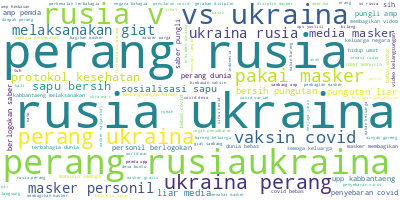

In [13]:
long_string = ';'.join(clean_tweet)
wordcloud = WordCloud(background_color='white', max_words=5000, 
                      contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

## <b>9. Evaluasi</b><br>
Evaluasi merupakan langkah yang penting agar dapat mengetahui bagaimana kualitas dari topic modelling yang telah dibangun. Pada bagian ini akan dilakukan evaluasi model yang dibentuk menggunakan LDA dengan meghitung nilai koherensi nya (Coherence) dimana semakin tinggi nilainya maka semakin baik juga hasil topic modelling yang telah dibangun.  
Evaluasi menggunakan dua jenis skor, Perplexity dan Coherence. 

<b>#Code 9</b><br>
<i>Code</i> ini digunakan untuk melakukan evaluasi LDA dengan membentuk fungsi - fungsi yang bersifat reusable

In [14]:
def calculate_perplexity(corpus):
    return lda.log_perplexity(corpus)

def calculate_coherence(model, word_corpus, dictionary):
    coherence_model_lda = CoherenceModel(model=model, texts=word_corpus, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [15]:
# Menghitung nilai perplexity untuk mengetahui seberapa baik model yang dibangun, semakin kecil nilainya maka semakin baik kualitasnya
print('\nNilai Perplexity: ', calculate_perplexity(corpus))

# Menghitung nilai koherensi / coherence. Rentang nilai berada di 1 < x < 0. Nilai yang bagus biasanya berada di rentang 0,85 < x < 0,65
print('\nNilai Coherence: ', calculate_coherence(lda, tweet_corpus, dictionary))


Nilai Perplexity:  -10.193539624910482

Nilai Coherence:  0.8296695424698857


Apakah nilai tersebut sudah mencerminkan bahwa hasil topic modelling yang dirancang sudah baik ? Belum tentu, karena untuk mendapatkan hasil yang lebih baik, salah satu faktor yang dapat diperbaiki adalah menentukan jumlah topic yang akan dipetakan. Saat ini hanya menggunakan 5 topic (k=5), namun nilai topic bisa berbeda. Lantas bagaimana menentukan nilai yang lebih baik ? Akan dijelaskan dibawah ini

### <b>Mencari jumlah topic yang optimal untuk LDA</b>
Pendekatan yang digunakan disini adalah melakukan iterasi nilai K (nilai besarnya angka topic) dari rentang inklusif [x,y] kemudian untuk setiap nilai K, hitung nilai perplexity dan coherencenya.

<b>#Code 9.1a</b><br>
<i>Code</i> ini berisi fungsi yang akan digunakan untuk mencari nilai topic terbaik dan melakukan visualisasi

In [26]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Fungsi menghitung coherence (c_v) untuk berbagai nilai topic.

    Parameter:
    ----------
    dictionary : Gensim dictionary
    corpus : Korpus data asli
    texts : Korpus tweet yang berada di #Code 4
    start : nilai awal topic
    limit : batas nilai topic
    step : increment nilai topic

    Pada contoh sebelumnya, nilai topic adalah 5, namun sekarang nilai topic
    di-iterasi dari rentang [start, limit] dengan incremental sebesar 'step'

    Keluaran:
    -------
    model_list : List dari LDA topic modelling yang bersesuaian dengan nilai topic tertentu
    coherence_values : Nilai coherence dari LDA topic modelling yang bersesuaian dengan nilai topic tertentu
    """
    model_list = []
    coherence_values = []
    perplexity_values = []
    for num_topics in range(start, limit, step):
        print("Saat ini mengolah nilai topic = ", num_topics)
        # Menambahkan model - model LDA
        model = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        # Menambahkan nilai - nilai coherence
        coherencemodel = calculate_coherence(model, texts, dictionary)
        coherence_values.append(coherencemodel)
        # Menambahkan nilai - nilai perplexity
        perplexityvalue = calculate_perplexity(corpus)
        perplexity_values.append(perplexityvalue)
    return model_list, coherence_values, perplexity_values

def visualize_perplexity(perplexity_values, start, limit, step):
    x = range(start, limit, step)
    plt.plot(x, perplexity_values)
    plt.xlabel("Besar nilai perplexity")
    plt.ylabel("Nilai perplexity")
    plt.legend(("perplexity_values"), loc='best')
    plt.show()

def visualize_coherence(coherence_values, start, limit, step):
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Besar nilai topic")
    plt.ylabel("Nilai coherence")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

<b>#Code 9.1b</b><br>
<i>Code</i> ini berfungsi untuk menjalankan pemanggilan fungsi untuk mendapatkan daftar model, daftar nilai coherence, dan daftar nilai perplexity

Saat ini mengolah nilai topic =  1
Saat ini mengolah nilai topic =  6
Saat ini mengolah nilai topic =  11


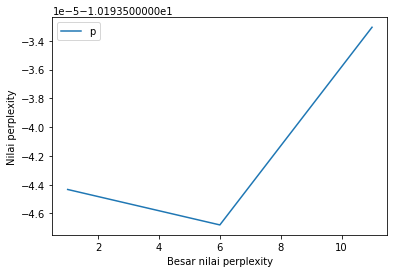

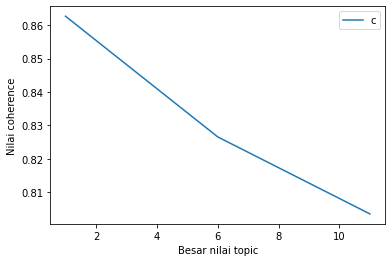

In [17]:
# PERHATIAN: Proses ini bisa memakan waktu 10-30 menit
TOPIC_START = 1
TOPIC_LIMIT = 13
TOPIC_STEP = 5

# Pembentukan daftar nilai model dan nilai coherence nya
model_list, coherence_values, perplexity_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=tweet_corpus,
    start=TOPIC_START,
    limit=TOPIC_LIMIT,
    step=TOPIC_STEP
)

# Visualisasi nilai perplexity
visualize_perplexity(perplexity_values, TOPIC_START, TOPIC_LIMIT, TOPIC_STEP)

# Visualisasi nilai topic
visualize_coherence(coherence_values, TOPIC_START, TOPIC_LIMIT, TOPIC_STEP)

## <b>10. Topic Modelling dengan Metode Lain</b><br>
Pada self pace learning kali ini akan menggunakan K-Means Clustering dan NNMF (Non Negative Matrix Factorization)

### <b>1. Pemodelan topik menggunakan K-Means Clustering</b><br>
Salah satu algoritma <i>clustering</i> lainnya yang umum digunakan adalah K-Means. Berikut adalah kode untuk mengeksekusi algoritma K-Means menggunakan library `sklearn`. Anda dapat membandingkan hasil <i>clustering</i> yang dilakukan oleh LDA dengan K-Means.

<b>#Code 10.1a</b><br>
<i>Code</i> ini digunakan untuk membangun model K-Means Clustering dengan nilai K=5

In [18]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_tweet)

# Train algoritma K-Means
kmeans = KMeans(n_clusters=5) # jumlah klaster = 5
kmeans.fit(X)

KMeans(n_clusters=5)

<b>#Code 10.1b</b><br>
<i>Code</i> ini digunakan menampilkan beberapa hasil kata dari cluster yang sudah dibangun

In [19]:
# Membuat dictionary untuk data cluster
clusters = {}

for tweet, cluster in zip(clean_tweet, kmeans.labels_.tolist()):
    if cluster not in clusters:
        clusters[cluster] = [tweet]
    else:
        clusters[cluster].append(tweet)

# Menampilkan sejumlah n=20 kata-kata dominan di masing-masing cluster
n_words = 20
for cluster, tweets in clusters.items():
    long_string = " ".join(tweets)
    words = nltk.word_tokenize(long_string)
    dominant_words = pd.Series(words).value_counts()[:n_words].index.to_list()

    print("Cluster " + str(cluster))
    print(" | ".join(dominant_words))
    print('='*90)

Cluster 0
makan | keluarga | bareng | orang | sih | rumah | pas | anak | malam | enak | kasih | tidak | teman | kayak | pakai | beli | suka | kerja | makanan | semoga
Cluster 1
perang | rusia | ukraina | rusiaukraina | vs | dunia | indonesia | nato | negara | putin | harga | presiden | invasi | konflik | amp | minyak | militer | orang | dampak | amerika
Cluster 3
masker | covid | penyebaran | pakai | kesehatan | disiplin | protokol | prokes | cegah | masyarakat | polsek | memakai | melaksanakan | vaksin | virus | varian | polres | gerakan | penularan | himbauan
Cluster 4
amp | sosialisasi | vaksin | personil | masker | media | covid | upp | giat | sapu | bersih | liar | pungutan | berlogokan | saber | kabbantaeng | pungli | pemda | melaksanakan | desa
Cluster 2
bebas | umat | negara | dunia | covid | masker | membagikan | video | kelangsungan | hidup | terbahagia | manusia | semoga | keluarga | perkenalan | bahagia | bahagiaㆍ | bahagiaampamp | ㅣperkenalan | ㅡperkenalan


### <b>2. Pemodelan topik menggunakan NNMF</b><br>

NNMF atau yang biasa disebut dengan Non-Negative Matrix Factorization sejatinya adalah metode statistik yang digunakan untuk menurunkan dimensi dari input yang berupa korpus. NNMF menggunakan metode analisis faktor untuk memberikan pemetaan kata - kata yang memiliki koherensi rendah dengan kata yang berbobot rendah. Cara kerja NNMF adalah dengan melakukan <i>decompose</i> vektor berdimensi tinggi men jadi vektor berdimensi rendah. Dengan menggunakan sebuah matriks (A), NNMF akan menghasilkan dua buah matriks (B dan C) dimana matriks X berisi topic yang ditemukan, dan matriks Y berisi bobot dari topik - topik tersebut.

Asumsikan ada 400  (Baris data), 5000 kata (Total) dan 50 topik, maka akan menghasilkan matriks berikut:
- A = 400 x 5000
- B = 5000 x 50
- C = 50 x 400

<b>#Code 10.2a</b><br>
<i>Code</i> ini digunakan untuk melakukan transformasi input data

In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_tweet)
words = np.array(vectorizer.get_feature_names())

<b>#Code 10.2b</b><br>
<i>Code</i> ini digunakan menampilkan beberapa topic yang sudah dibangun

In [21]:
nmf = NMF(n_components=5, solver="mu")
B = nmf.fit_transform(X)
C = nmf.components_

for i, topic in enumerate(C):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

print("")
print("Matriks B ada sebanyak " + str(len(B)) + " baris dan " + str(len(B[0])) + " kolom")
print("Matriks C ada sebanyak " + str(len(C)) + " baris dan " + str(len(C[0])) + " kolom")

Topic 1: semoga,hidup,video,manusia,bahagia,umat,perkenalan,terbahagia,kelangsungan,bebas
Topic 2: kabbantaeng,bersih,sosialisasi,saber,liar,pungutan,sapu,berlogokan,upp,amp
Topic 3: presiden,putin,nato,rusiaukraina,dunia,indonesia,vs,ukraina,perang,rusia
Topic 4: polsek,protokol,pakai,gerakan,kesehatan,penyebaran,cegah,disiplin,covid,masker
Topic 5: pas,teman,rumah,sih,enak,orang,malam,bareng,keluarga,makan

Matriks B ada sebanyak 41015 baris dan 5 kolom
Matriks C ada sebanyak 5 baris dan 39114 kolom


# <b><font color='red'>B. Tugas Self Paced Learning - Topic Modelling</font></b>

1. <b>[10 Poin]</b> Terlihat pada hasil keluaran kode pada cell #Code2a tanggal 24 Februari 2022 dan 4 Maret 2022 terjadi lonjakan aktivitas yang cukup tajam. Menurut Anda berdasarkan ketiga keyword utama yang berperan membangun dataset ini (Refer ke Section 2), keyword manakah yang menyebabkan adanya lonjakan aktivitas pada tanggal tersebut (Keyword 1/2/3) ? dan berikan alasannya.

2. <b>[10 Poin]</b> Menurut Anda, apa tujuan utama dari <i>pembentukan term document dan term document frequency</i> ? Apakah ada keuntungan dan kerugian yang mungkin diakibatkan dari proses ini apabila teknik ini tidak hanya diterapkan pada topic modelling, tapi pada aktivitas lain yang membutuhkan manipulasi data tekstual ?

3. <b>[10 Poin]</b> Berdasarkan hasil dari <b>#Code 7</b> apa maksud dari angka desimal yang muncul disamping setiap kata pada hasil keluaran kode? Berikan penjelasan Anda

4. <b>[30 Poin]</b> Cobalah untuk menjalankan tahap <b>4. Membuat korpus dari seluruh data tweet</b> hingga akhir tetapi menggunakan data tweet indeks inklusif [0,10000] , [20000,30000], dan [30000,40000] dalam percobaan terpisah, dengan begitu akan ada 3x percobaan). Apakah masing - masing penggolongan topic yang dihasilkan lebih baik (berdasarkan pengetahuan manusia) daripada apa yang dihasilkan di <b>#Code 8a</b> ? Jelaskan jawaban Anda

Catatan nomor 4, perbandingan yang dimaksud adalah
- Data indeks [10,20000] vs hasil dari <b>#Code 8a</b>
- Data indeks [20000,30000] vs hasil dari <b>#Code 8a</b>
- Data indeks [30000,akhir] vs hasil dari<b>#Code 8a</b>

5. <b>[40 Poin]</b> Anda diberikan dataset baru dengan keyword tertentu yang diambil dari tanggal 1 Januari 2021 hingga 31 Desember 2021 dengan maksimal 11000 tweets. Silakan lakukan semua tahap yang sudah diajarkan pada self paced learning ini dari mulai tahap preprocessing hingga pembentukan visualisasi dari topic modelling (awal hingga akhir). Jelaskan setiap tahap yang dilakukan dan jelaskan juga apa hasil serta kesimpulan atau hal menarik apa yang Anda dapatkan!

Ketentuan dataset:
Dataset sudah disediakan di cell bawah, cukup gunakan kolom `id`, `text` dan `created_at` saja
- Laki - laki dengan angka terakhir NPM GANJIL: keyword `menguasai dunia`
- Laki - laki dengan angka terakhir NPM GENAP: keyword `butuh liburan`
- Perempuan dengan angka terakhir NPM GANJIL: keyword `makan seblak`
- Perempuan dengan angka terakhir NPM GENAP: keyword `nonton kpop`

Jawaban nomor 5 harus mengandung:
- Preprosessing
- Pembuatan korpus
- Membuat term dictionary & term document frequency
- Pembentukan model dengan LDA
- Visualisasi
- Evaluasi

Selamat Mengerjakan!  
Jangan lupa berdoa, makan dan mencuci tangan!

In [22]:
# Dataset keyword "menguasai dunia", silakan di-uncomment semua baris di bawah ini

# !wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1p2BMF7GDZA6u3wmvbxMO5bs3QxU4m8A_' -O menguasai_dunia.csv
# datafile_a = 'menguasai_dunia.csv'
# tweets_a = pd.read_csv(datafile_a)
# tweets_a

In [37]:
# Dataset keyword "butuh liburan", silakan di-uncomment semua baris di bawah ini

# !wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1aGY6y9vABCKD08MkA6Rwv2FkALHf5VbY' -O butuh_liburan.csv
datafile_b = 'butuh_liburan.csv'
tweets_b = pd.read_csv(datafile_b)
# tweets_b

In [24]:
# Dataset keyword "makan seblak", silakan di-uncomment semua baris di bawah ini

# !wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1x-8ev32dumbu0zENIrEtIJQPfmqKk6H-' -O makan_seblak.csv
# datafile_c = 'makan_seblak.csv'
# tweets_c = pd.read_csv(datafile_c)
# tweets_c

In [25]:
# Dataset keyword "nonton kpop", silakan di-uncomment semua baris di bawah ini

# !wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IzTzONy2Ih5YyXQoMYDd60Nh79YakmQ4' -O nonton_kpop.csv
# datafile_d = 'nonton_kpop.csv'
# tweets_d = pd.read_csv(datafile_d)
# tweets_d

<b>1</b>
<p>Dari data visualisasi ternyata lonjakan terjadi karena ada perang Rusia dan Ukraina sehingga keyword-nya yang muncul adalah tentang perang Rusia Ukraina</p>
<br>
<b>2</b>
<p>TFIDF sangat memudahkan dalam melakukan pemodelan dan juga komputasi. Karena TFIDF berbasiskan BOW sehingga tidak memperhitungkan korelasi dari setiap kata.</p>
<br>
<b>3</b>
<p>Beban dari kata setelah masuk dalam fungsi TFIDF. Karena TFIDF merubah dari BOW menjadi suatu vektor kata.</p>

In [43]:
# [0,10000]

#4
tweet_corpus_1 = create_tweet_corpus(clean_tweet[0:10000])

#5
dictionary_1 = corpora.Dictionary(tweet_corpus_1)

#6
corpus_1 = [dictionary_1.doc2bow(text) for text in tweet_corpus_1]

#7
tfidf_1 = models.TfidfModel(corpus_1)  # Tahap 1 -- menginisialisasi model
corpus_tfidf_1 = tfidf_1[corpus_1]  # Tahap 2 -- menggunakan model untuk mendapatkan corpus vectors

total_topics_1 = 5 # Jumlah topik = 5
lda_1 = models.ldamodel.LdaModel(corpus_1, id2word=dictionary_1, num_topics=total_topics_1)
corpus_lda_1 = lda[corpus_1]

#8
pyLDAvis.enable_notebook()
panel_1 = pyLDAvis.gensim_models.prepare(lda_1, corpus_1, dictionary_1, mds='tsne')
panel_1

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  20.400498
0       51.163364 -159.968018       2        1  19.947469
4      -73.144554   21.523815       3        1  19.917128
3      -66.410133 -110.606438       4        1  19.902712
1       54.417324   12.443444       5        1  19.832193, topic_info=               Term         Freq        Total Category  logprob  loglift
1847         masker  8882.000000  8882.000000  Default  30.0000  30.0000
3600          covid  8569.000000  8569.000000  Default  29.0000  29.0000
16748      disiplin  4118.000000  4118.000000  Default  28.0000  28.0000
320             amp  3521.000000  3521.000000  Default  27.0000  27.0000
7302        gerakan  3219.000000  3219.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
16815  kectompobulu   454.018401   456.637239   Topic5  -4.2111   1.6121
2             rumah   124.254550   124.990122   Topic5  -5.5069   1.6120
180           pasar   119.891326   120.626953   Topic5  -5.5427   1.6117
16941  kelangsungan   331.449329   337.172777   Topic5  -4.5258   1.6007
16813          bpnt   226.637311   231.605352   Topic5  -4.9059   1.5962

[199 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
1346       1  0.997275     aman
320        1  0.999674      amp
128        4  0.982144     anak
587        1  0.999102  anggota
5789       1  0.997308   aturan
...      ...       ...      ...
3010       4  0.995190  weekend
7888       2  0.997653  wilayah
16756      2  0.993226     woro
16756      5  0.003679     woro
16730      2  0.997461  yustisi

[267 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 4, 2])

In [44]:
# [20000, 30000]

#4
tweet_corpus_2 = create_tweet_corpus(clean_tweet[20000:30000])

#5
dictionary_2 = corpora.Dictionary(tweet_corpus_2)

#6
corpus_2 = [dictionary_2.doc2bow(text) for text in tweet_corpus_2]

#7
tfidf_2 = models.TfidfModel(corpus_2)  # Tahap 1 -- menginisialisasi model
corpus_tfidf_2 = tfidf_2[corpus_2]  # Tahap 2 -- menggunakan model untuk mendapatkan corpus vectors

total_topics_2 = 5 # Jumlah topik = 5
lda_2 = models.ldamodel.LdaModel(corpus_2, id2word=dictionary_2, num_topics=total_topics_2)
corpus_lda_2 = lda[corpus_2]

#8
pyLDAvis.enable_notebook()
panel_2 = pyLDAvis.gensim_models.prepare(lda_2, corpus_2, dictionary_2, mds='tsne')
panel_2

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      150.222153  -72.269554       1        1  20.578524
2       51.163364 -159.968018       2        1  20.461512
4      -73.144554   21.523815       3        1  19.738382
3      -66.410133 -110.606438       4        1  19.697883
1       54.417324   12.443444       5        1  19.523700, topic_info=             Term         Freq        Total Category  logprob  loglift
4          perang  9866.000000  9866.000000  Default  30.0000  30.0000
15          rusia  8247.000000  8247.000000  Default  29.0000  29.0000
16        ukraina  8041.000000  8041.000000  Default  28.0000  28.0000
5    rusiaukraina  1661.000000  1661.000000  Default  27.0000  27.0000
31             vs  1608.000000  1608.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
384        hancur    72.241960    73.048096   Topic5  -5.8468   1.6224
613       kondisi    65.897783    66.703936   Topic5  -5.9387   1.6214
308  selengkapnya    57.886506    58.692628   Topic5  -6.0683   1.6197
399        langka    55.827695    56.633878   Topic5  -6.1045   1.6192
883          kuat    54.200586    55.006802   Topic5  -6.1341   1.6188

[183 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
952       3  0.994241  abramovich
683       1  0.997626       agama
253       1  0.996806      akibat
687       1  0.995713      alasan
17        2  0.986918        aman
...     ...       ...         ...
31        1  0.999578          vs
265       5  0.992708         war
123       2  0.994811       warga
910       4  0.996290         wni
115       5  0.997631    zelensky

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])

In [45]:
# [30000, 40000]

#4
tweet_corpus_3 = create_tweet_corpus(clean_tweet[30000:40000])

#5
dictionary_3 = corpora.Dictionary(tweet_corpus_3)

#6
corpus_3 = [dictionary_3.doc2bow(text) for text in tweet_corpus_3]

#7
tfidf_3 = models.TfidfModel(corpus_3)  # Tahap 1 -- menginisialisasi model
corpus_tfidf_3 = tfidf_3[corpus_3]  # Tahap 2 -- menggunakan model untuk mendapatkan corpus vectors

total_topics_3 = 5 # Jumlah topik = 5
lda_3 = models.ldamodel.LdaModel(corpus_3, id2word=dictionary_3, num_topics=total_topics_3)
corpus_lda_3 = lda[corpus_3]

#8
pyLDAvis.enable_notebook()
panel_3 = pyLDAvis.gensim_models.prepare(lda_3, corpus_3, dictionary_3, mds='tsne')
panel_3

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  20.245085
2       51.163364 -159.968018       2        1  20.183990
1      -73.144554   21.523815       3        1  19.971622
4      -66.410133 -110.606438       4        1  19.821643
0       54.417324   12.443444       5        1  19.777660, topic_info=              Term          Freq         Total Category  logprob  loglift
8           perang  11342.000000  11342.000000  Default  30.0000  30.0000
14         ukraina   9716.000000   9716.000000  Default  29.0000  29.0000
12           rusia   9687.000000   9687.000000  Default  28.0000  28.0000
100          dunia   1687.000000   1687.000000  Default  27.0000  27.0000
27    rusiaukraina   1366.000000   1366.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
672          allah     67.454015     68.249609   Topic5  -5.8713   1.6089
700        situasi     64.291356     65.086946   Topic5  -5.9193   1.6083
3515       tanggal     59.895338     60.692434   Topic5  -5.9901   1.6074
335          bantu     59.420732     60.216364   Topic5  -5.9981   1.6073
412          medan     55.620751     56.416416   Topic5  -6.0642   1.6064

[180 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
433       3  0.988225    agama
186       4  0.992448   alasan
672       5  0.981691    allah
8181      5  0.995045   ambang
251       4  0.991028    ambil
...     ...       ...      ...
349       2  0.998700      war
533       3  0.992598    warga
669       3  0.997072  wilayah
1002      2  0.999419    world
614       4  0.997516       ww

[150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 1])

<p>Menurut saya antara 8a dengan percobaan lain hasilnya sedikit berbeda dikarenakan ada perbedaan terjadinya peristiwa. Pada percobaan 1 belum terjadi pecah perang rusia ukraina akan tetapi mulai puncak ketika percobaan 2 dan 3.</p>

In [47]:
#3
raw_tweet_b = tweets_b['text']

stopwords = pd.read_csv("stopwordsID.csv", header=None)
df_kamus_singkatan = pd.read_csv('./kamus_singkatan.csv')
df_kamus_alay = pd.read_csv('colloquial-indonesian-lexicon.csv')

# Melakukan pra pemrosesan tweet.
# CATATAN: proses ini akan memakan waktu sekitar 15-20 menit karena banyaknya data yang perlu diproses
print("Sedang memproses tweet... Mohon menunggu")
clean_tweet_b = pra_pemrosesan(raw_tweet_b)

#4
tweet_corpus_b = create_tweet_corpus(clean_tweet_b)

#5
dictionary_b = corpora.Dictionary(tweet_corpus_b)

#6
corpus_b = [dictionary_b.doc2bow(text) for text in tweet_corpus_b]

#7
tfidf_b = models.TfidfModel(corpus_b)  # Tahap 1 -- menginisialisasi model
corpus_tfidf_b = tfidf_b[corpus_b]  # Tahap 2 -- menggunakan model untuk mendapatkan corpus vectors

total_topics_b = 5 # Jumlah topik = 5
lda_b = models.ldamodel.LdaModel(corpus_b, id2word=dictionary_b, num_topics=total_topics_b)
corpus_lda_b = lda[corpus_b]

#8
pyLDAvis.enable_notebook()
panel_b = pyLDAvis.gensim_models.prepare(lda_b, corpus_b, dictionary_b, mds='tsne')
panel_b

Sedang memproses tweet... Mohon menunggu


100%|██████████| 10324/10324 [05:01<00:00, 34.19it/s]


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  20.537940
0       51.163364 -159.968018       2        1  20.317191
1      -73.144554   21.523815       3        1  19.956119
4      -66.410133 -110.606438       4        1  19.730726
3       54.417324   12.443444       5        1  19.458025, topic_info=          Term          Freq         Total Category  logprob  loglift
6        butuh  11170.000000  11170.000000  Default  30.0000  30.0000
7      liburan  10625.000000  10625.000000  Default  29.0000  29.0000
241        amp    793.000000    793.000000  Default  28.0000  28.0000
3          sih    706.000000    706.000000  Default  27.0000  27.0000
240       tour    688.000000    688.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
213    kasihan     55.860300     56.647138   Topic5  -5.7178   1.6229
140   sebentar     54.294114     55.081006   Topic5  -5.7463   1.6225
2306     sobat     52.914131     53.701570   Topic5  -5.7720   1.6221
9346      sale    101.201488    119.788848   Topic5  -5.1236   1.4683
9345      epic     92.640297    117.168427   Topic5  -5.2120   1.4020

[182 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
164       4  0.990474         aa
435       4  0.977770       ajak
338       4  0.993964  aktivitas
444       2  0.998476      allah
42        4  0.992647      allin
...     ...       ...        ...
2537      2  0.998977      wajib
1684      2  0.993224    weekend
41        1  0.995048     wisata
11        5  0.995992       wkwk
74        4  0.997364        yuk

[160 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 5, 4])

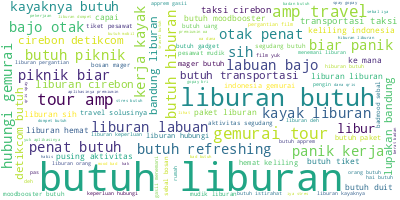

In [50]:
long_string_b = ';'.join(clean_tweet_b)
wordcloud_b = WordCloud(background_color='white', max_words=5000, 
                      contour_width=3, contour_color='steelblue')
wordcloud_b.generate(long_string_b)
wordcloud_b.to_image()

In [48]:
# Menghitung nilai perplexity untuk mengetahui seberapa baik model yang dibangun, semakin kecil nilainya maka semakin baik kualitasnya
print('\nNilai Perplexity: ', calculate_perplexity(corpus_b))

# Menghitung nilai koherensi / coherence. Rentang nilai berada di 1 < x < 0. Nilai yang bagus biasanya berada di rentang 0,85 < x < 0,65
print('\nNilai Coherence: ', calculate_coherence(lda_b, tweet_corpus_b, dictionary_b))


Nilai Perplexity:  -14.773979934623659

Nilai Coherence:  0.8339276371477691
